In [1]:
import sys
sys.path.append("XXXX")
import torch
from torch.utils.data import TensorDataset, DataLoader
import numpy as np
from sklearn.datasets import make_circles
import matplotlib.pyplot as plt
from models import VariationalAE
np.random.seed(2022)
torch.manual_seed(2022)

/Users/bahador/anaconda3/envs/dl_py39/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm

Bad key code in file /Users/bahador/.matplotlib/matplotlibrc, line 1 ('code: backend: TkAgg')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.6.2/matplotlibrc.template
or from the matplotlib source distribution


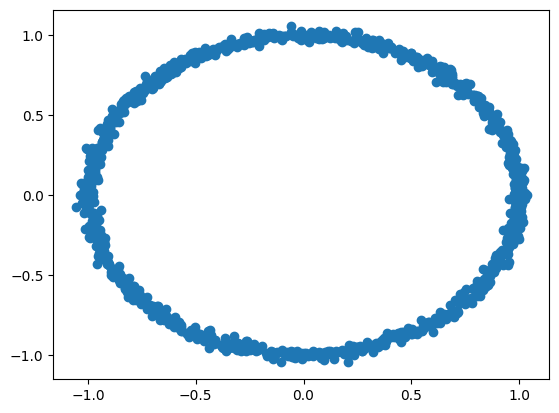

In [2]:
data, _ = make_circles(n_samples=1000, noise=0.02, factor=0.999)
plt.scatter(data[:, 0], data[:, 1])
plt.show()
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

dataset = TensorDataset(torch.from_numpy(data).float(), torch.zeros(data.shape[0]))
dataloader = DataLoader(dataset, shuffle=True, batch_size=100)


In [3]:
vae = VariationalAE(device=device)
optim = torch.optim.Adam(params=vae.parameters(), lr=0.01)

kld_weight = .1

model initilized!
model initilized!


In [16]:
for epoch in range(2000):
    epoch_loss = 0.
    for x,_ in dataloader:
        mu, log_var, z, x_ = vae(x)
        loss, loss_record = vae.loss_function(x, mu, log_var, x_, kld_weight)
        optim.zero_grad()
        loss.backward()
        optim.step()
        print(f"epoch {epoch} loss {loss.item()} recnst {loss_record['recon']} kl {loss_record['KLD']}")

epoch 0 loss 0.20389403402805328 recnst 0.04626170173287392 kl -1.576323390007019
epoch 0 loss 0.2326732724905014 recnst 0.07069587707519531 kl -1.6197739839553833
epoch 0 loss 0.21243616938591003 recnst 0.04636267572641373 kl -1.660735011100769
epoch 0 loss 0.22862234711647034 recnst 0.06537608057260513 kl -1.632462501525879
epoch 0 loss 0.2117362916469574 recnst 0.04506275802850723 kl -1.6667351722717285
epoch 0 loss 0.20809383690357208 recnst 0.038410041481256485 kl -1.6968380212783813
epoch 0 loss 0.20553427934646606 recnst 0.0387171134352684 kl -1.6681716442108154
epoch 0 loss 0.22674885392189026 recnst 0.05979807674884796 kl -1.6695077419281006
epoch 0 loss 0.21986350417137146 recnst 0.050187624990940094 kl -1.69675874710083
epoch 0 loss 0.21991270780563354 recnst 0.051547080278396606 kl -1.6836562156677246
epoch 1 loss 0.2119934856891632 recnst 0.042132582515478134 kl -1.6986089944839478
epoch 1 loss 0.2103503793478012 recnst 0.04133396968245506 kl -1.6901640892028809
epoch 1 lo

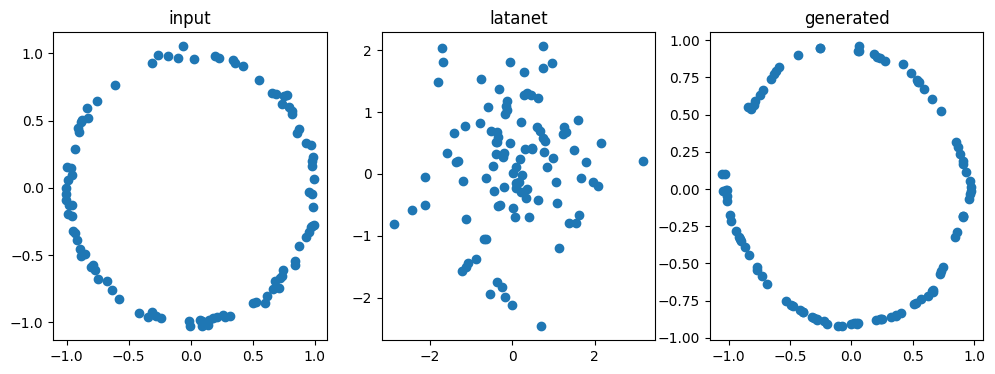

In [21]:
# x = x.detach().numpy()
# x_ = x_.detach().numpy()
# z = z.detach().numpy()
fig, ax = plt.subplots(1, 3, figsize=(12, 4))
ax[0].scatter(x[:, 0], x[:, 1])
ax[0].set_title('input')
ax[1].scatter(z[:, 0], z[:, 1])
ax[1].set_title('latanet')
ax[2].scatter(x_[:, 0], x_[:, 1])
ax[2].set_title('generated')
plt.show()
plt.close()